## Falcons
#### (Mohammed Almatrafi, Yazeed Alghamdi, Yasser Alshehri, Abdulrahim Aljadani)
prediction of the sales for the upcoming 4 months

In [11]:
import pandas as pd
from pandas import DataFrame

In [12]:
df = pd.read_csv('sales.csv')

C:\Users\ma0me\AppData\Local\Temp\ipykernel_19384\1669249776.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales.csv')


In [13]:
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
592556,273284,620,6,2015-02-28,852,1,0,0,0,10070
592557,95245,487,6,2015-02-28,780,1,0,0,0,7723
592558,625491,707,6,2015-02-28,632,1,0,0,0,6451
592559,643088,786,6,2015-02-28,196,1,0,0,0,1369


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           592561 non-null  int64 
 1   store_ID             592561 non-null  int64 
 2   day_of_week          592561 non-null  int64 
 3   date                 592561 non-null  object
 4   nb_customers_on_day  592561 non-null  int64 
 5   open                 592561 non-null  int64 
 6   promotion            592561 non-null  int64 
 7   state_holiday        592561 non-null  object
 8   school_holiday       592561 non-null  int64 
 9   sales                592561 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 45.2+ MB


In [15]:
df.state_holiday.unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

In [16]:
df.school_holiday.unique()

array([1, 0], dtype=int64)

In [17]:
df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000
mean,356039.480762,558.463546,4.002315,634.848002,0.831509,0.379419,0.181418,5744.577431
std,205596.545847,321.957991,1.995855,465.330476,0.374302,0.485243,0.385364,3832.896126
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177871.000000,280.000000,2.000000,404.000000,1.000000,0.000000,0.000000,3703.000000
50%,356159.000000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5702.000000
75%,534138.000000,837.000000,6.000000,839.000000,1.000000,1.000000,0.000000,7808.000000
max,712044.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,38037.000000


### What to do
- unnamed:0 remove or figure out what to do with it
- clean state holiday and figure out the different categories
- convert date from string to date object

In [18]:
def drop_unnamed_column(df: DataFrame):
    df = df.copy()
    return df.drop(columns=['Unnamed: 0'])

def convert_date_to_date(df: DataFrame):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    return df

def clean_state_holiday(df: DataFrame): # from ['a', 'b', 'c', '0', 0] -> [1,2,3,0]
    df = df.copy()
    df['state_holiday'] = df['state_holiday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0, 0: 0})
    df = pd.get_dummies(df, columns=['state_holiday'], prefix='holiday', dtype=int) # one hot encoding
    return df

def encode_day_of_week(df: DataFrame):
    df = df.copy()
    df = pd.get_dummies(df, columns=['day_of_week'], prefix='day', dtype=int) # one hot encoding
    return df

mean_sales = df.groupby('store_ID')['sales'].mean()
global_sales = df['sales'].mean()
def store_id_encoding(df: DataFrame):
    df = df.copy()
    df['store_id_encoded'] = df['store_ID'].map(mean_sales)
    return df

# def sort_by_date(df: DataFrame):
#     df = df.copy()
#     df = df.sort_values(by=['date', df.index.name], ascending=[True, True])
#     return df 

In [19]:
cl_df = (
        df
        .pipe(drop_unnamed_column)
        .pipe(convert_date_to_date)
        .pipe(clean_state_holiday)
        .pipe(encode_day_of_week)
        # .pipe(sort_by_date)
        .pipe(store_id_encoding)
    )

C:\Users\ma0me\AppData\Local\Temp\ipykernel_19384\2538747656.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['state_holiday'] = df['state_holiday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0, 0: 0})


### Feature engineering
first let's do correlation map to decide which features that correlate to the sale and then include them.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

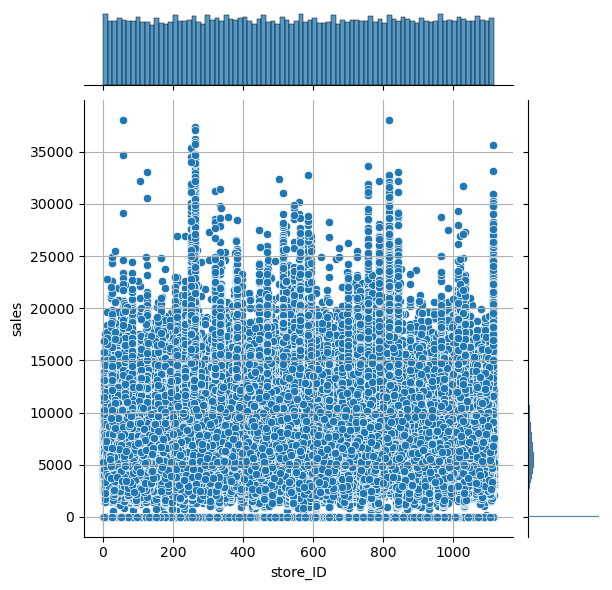

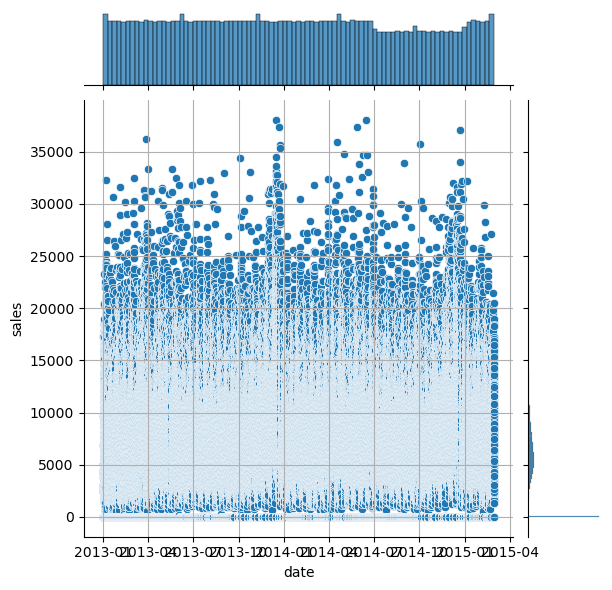

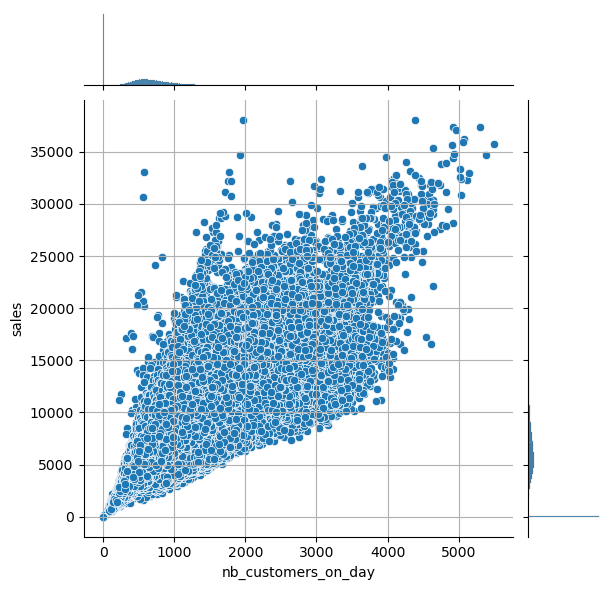

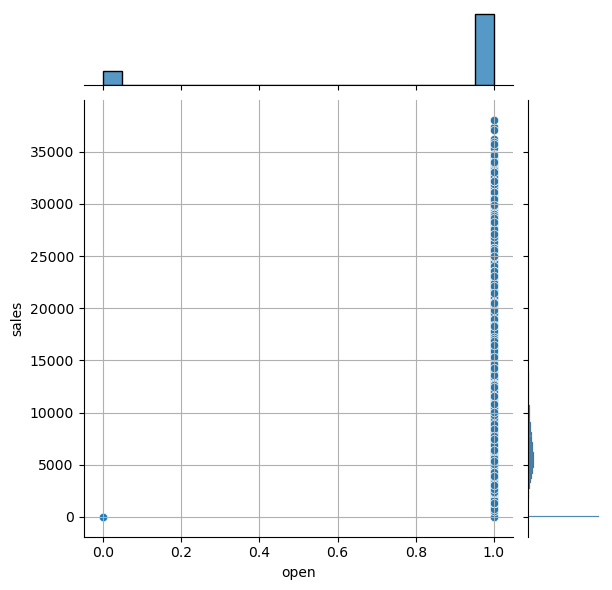

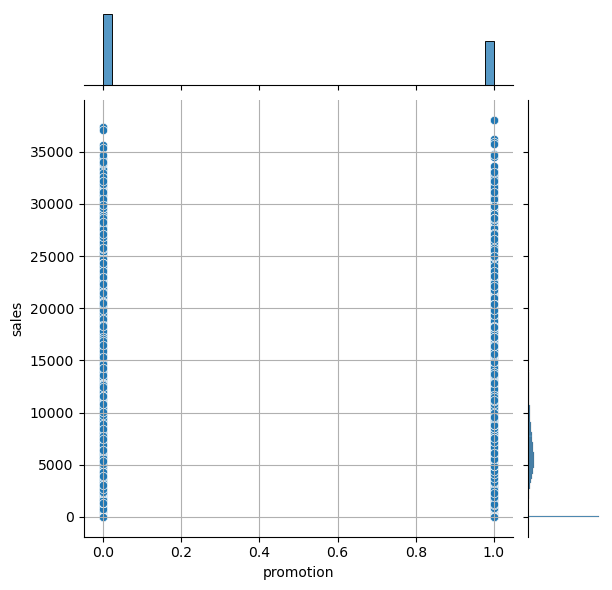

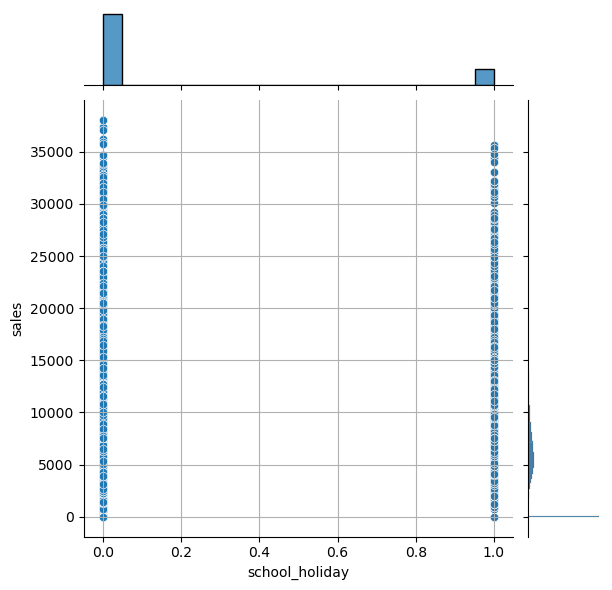

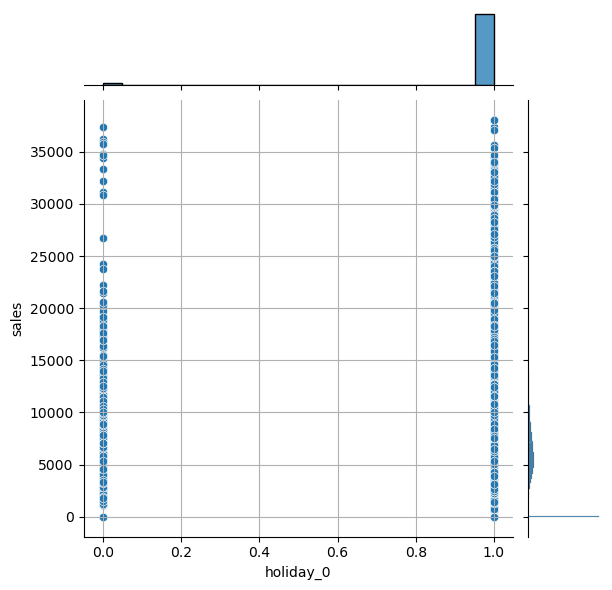

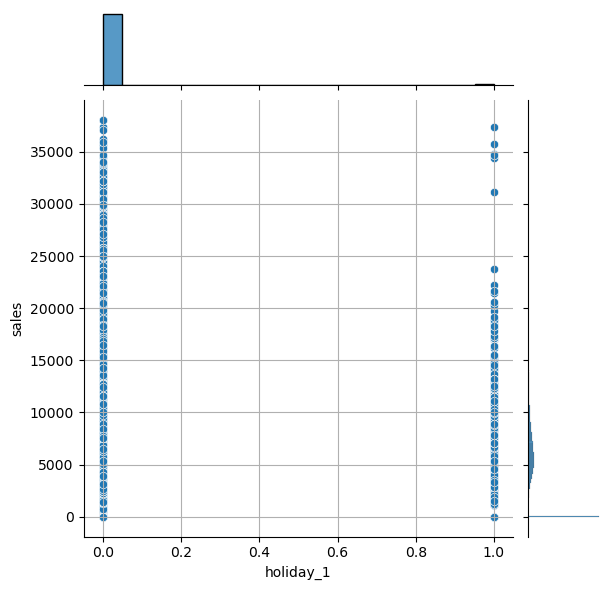

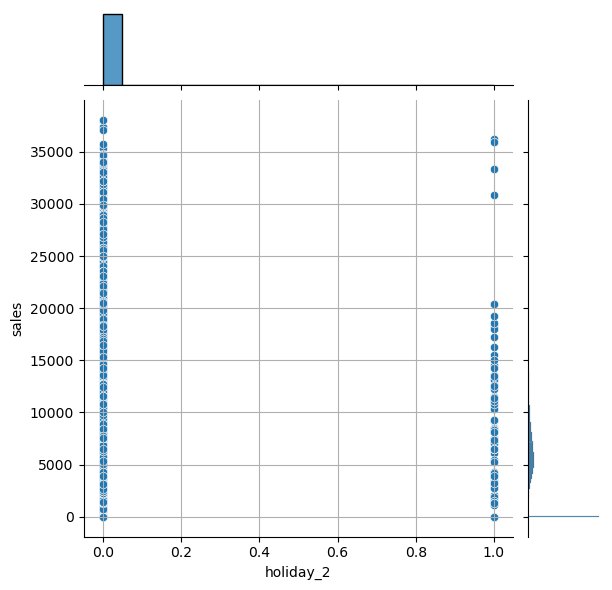

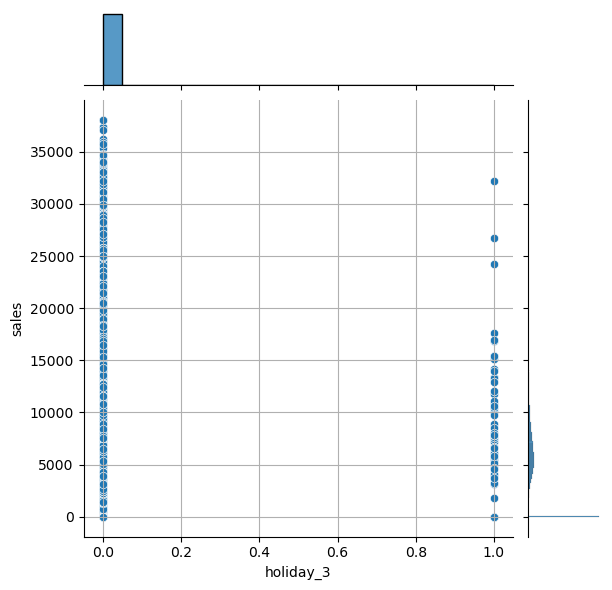

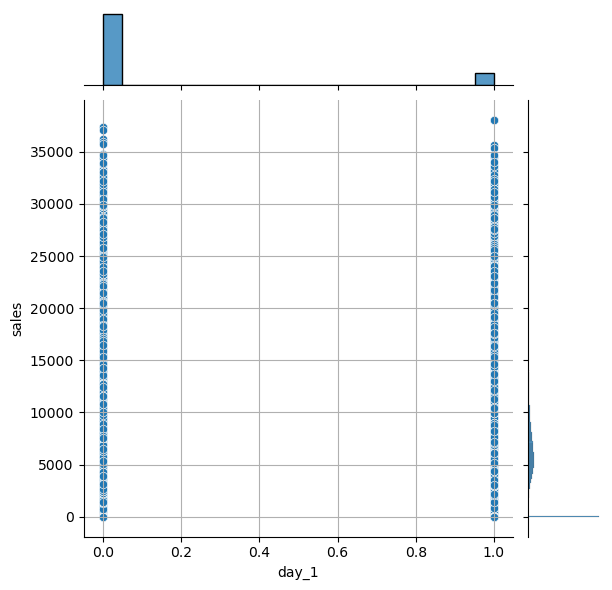

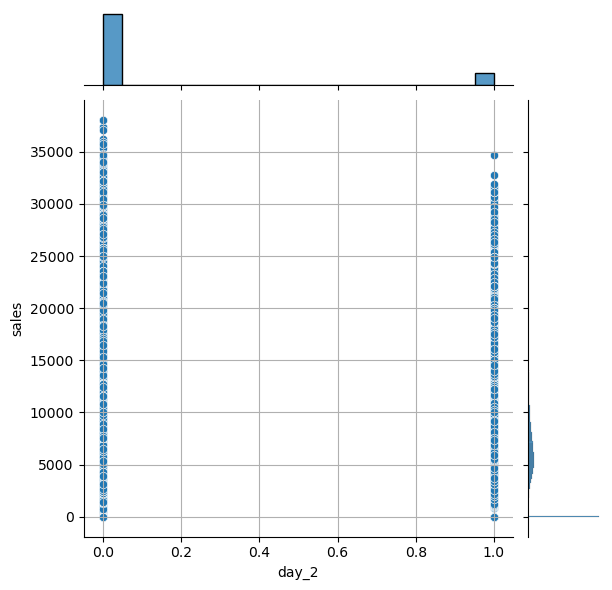

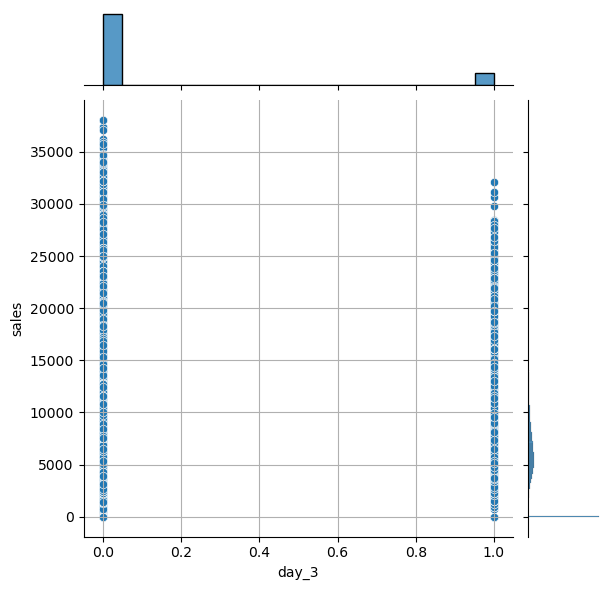

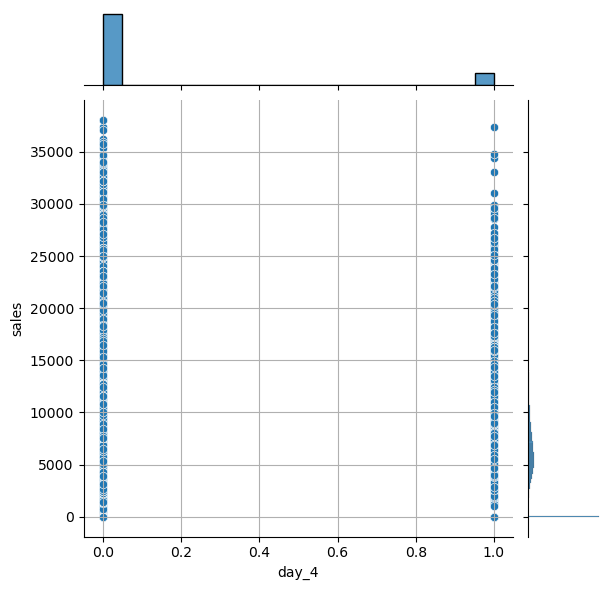

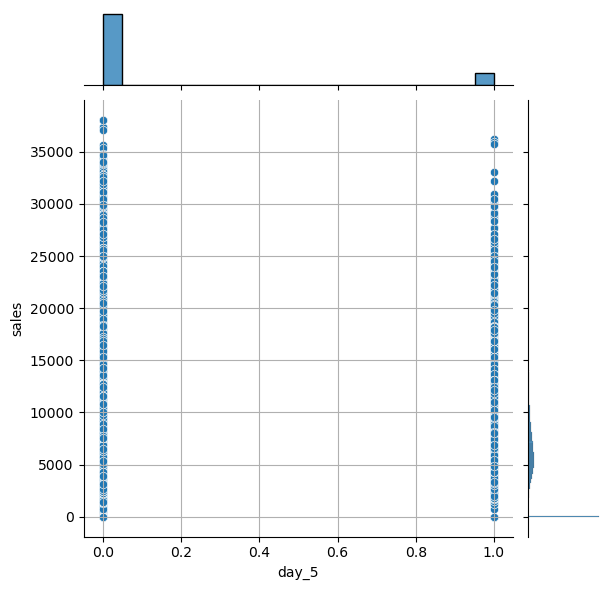

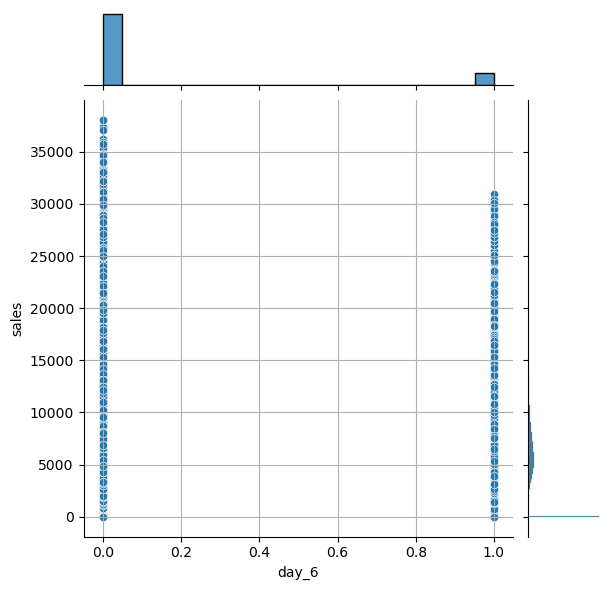

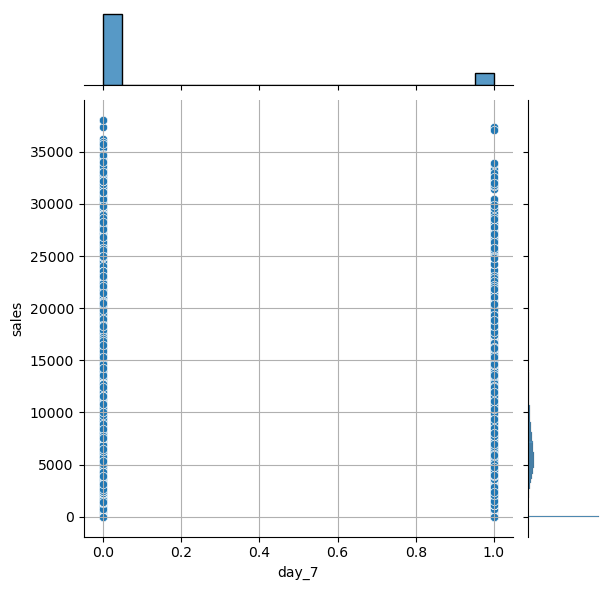

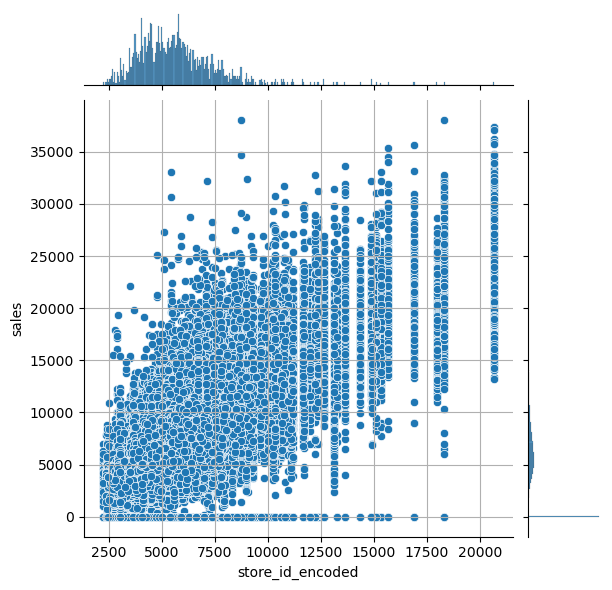

In [21]:
for feature in cl_df.drop(columns=['sales']).columns:
    sns.jointplot(data=cl_df, x=feature, y='sales')
    plt.grid();

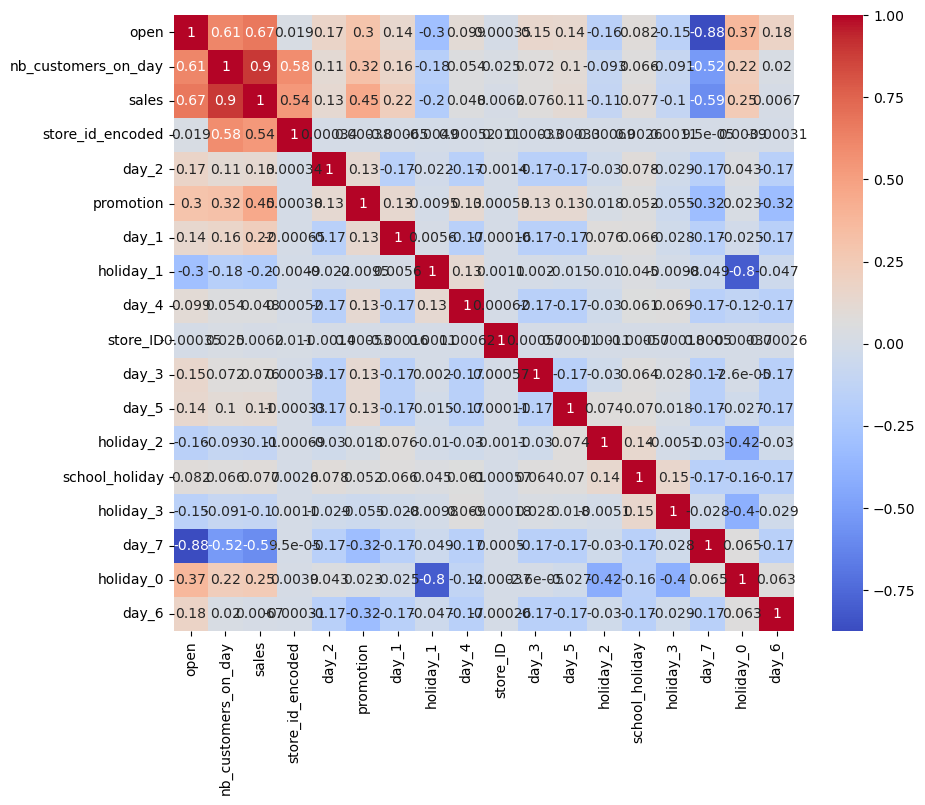

In [22]:
def plot_clustered_correlation_matrix(corrs):
    # clustering correlation matrix
    linkage_matrix = linkage(corrs, method='ward');
    # plot clustered correlation matrix
    leaves = dendrogram(linkage_matrix, labels=corrs.columns, orientation='left')['leaves'];
    plt.close()
    col_order = corrs.columns[leaves]
    # plot clustered correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corrs.loc[col_order, col_order], annot=True, cmap='coolwarm')

# The error is caused because the corr() method only works with numerical data.
# To fix this, we need to select only the numerical columns before calculating the correlation matrix.
# We can achieve this using the select_dtypes method and include only number data types.
corrs = cl_df.select_dtypes(include=['number']).corr()
plot_clustered_correlation_matrix(corrs)

From the analysis above we can see that the features that correlate the best to the sales are:
- nb_customers_on_day
- open
- promotion

### Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
X = cl_df[
    [
        'nb_customers_on_day',
        'promotion',
        'open',
        'day_1',
        'day_2',
        'day_3',
        'day_4',
        'day_5',
        'day_6',
        'day_7',
        'holiday_0',
        'holiday_1',
        'holiday_2',
        'holiday_3',
        'store_id_encoded'
        ]
    ]
y = cl_df[['sales']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [97]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(x_test)

In [99]:
mae = mean_squared_error(y_test, y_pred)
mae # 1821458.516709777 seems to high but i guess that's okay because of large data

1821458.516709777

In [100]:
r2 = r2_score(y_test, y_pred)
r2 # 0.878573577469329

0.878573577469329

#### OLS regression model

In [107]:
import statsmodels.api as sm
ols_X = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, ols_X).fit()

#### Conducting a Hypothesis Test on the Model

In [108]:
print_model = ols_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 2.474e+05
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:38:38   Log-Likelihood:            -3.5589e+06
No. Observations:              414792   AIC:                         7.118e+06
Df Residuals:                  414778   BIC:                         7.118e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1910.1440    

### 4 month prediction

In [75]:
real_df = pd.read_csv('real_data.csv')
real_df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday
count,119484.000000,119484.000000,119484.000000,119484.000000,119484.000000,119484.000000,119484.00000
mean,355935.307070,557.573541,3.990099,626.218623,0.823550,0.391935,0.16429
std,205318.834338,321.603480,2.000153,459.455217,0.381205,0.488184,0.37054
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,178630.000000,279.000000,2.000000,410.000000,1.000000,0.000000,0.00000
50%,355209.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.00000
75%,533516.250000,836.000000,6.000000,828.000000,1.000000,1.000000,0.00000
max,712042.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.00000


#### Preprocessing real data

In [76]:
real_df = (
    real_df
    .pipe(drop_unnamed_column)
    .pipe(convert_date_to_date)
    .pipe(clean_state_holiday)
    .pipe(encode_day_of_week)
    # .pipe(sort_by_date)
)
real_df

C:\Users\ma0me\AppData\Local\Temp\ipykernel_19384\2538747656.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['state_holiday'] = df['state_holiday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0, 0: 0})


,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,holiday_0,holiday_1,holiday_2,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,637,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,801,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,354,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,371,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,515,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119479,1105,2015-07-31,765,1,1,1,1,0,0,0,0,0,0,1,0,0
119480,106,2015-07-31,958,1,1,1,1,0,0,0,0,0,0,1,0,0
119481,321,2015-07-31,688,1,1,1,1,0,0,0,0,0,0,1,0,0
119482,631,2015-07-31,765,1,1,1,1,0,0,0,0,0,0,1,0,0


#### Checking the data

In [77]:
real_df.isna().sum()

store_ID               0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
school_holiday         0
holiday_0              0
holiday_1              0
holiday_2              0
day_1                  0
day_2                  0
day_3                  0
day_4                  0
day_5                  0
day_6                  0
day_7                  0
dtype: int64

#### Missing values
- no holiday of type 3 (c)

In [78]:
real_df['holiday_3'] = 0 # filling missing data

#### Fill store_id encoding
- mean_value of known stores ids
- global_mean_value of new stores ids

In [79]:
real_df = (
    real_df
    .pipe(store_id_encoding)
)
real_df # no new stores!

,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,holiday_0,holiday_1,holiday_2,day_1,day_2,day_3,day_4,day_5,day_6,day_7,holiday_3,store_id_encoded
0,637,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,6938.620370
1,801,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3946.307292
2,354,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,6952.016216
3,371,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,5656.447464
4,515,2015-03-01,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7493.151899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119479,1105,2015-07-31,765,1,1,1,1,0,0,0,0,0,0,1,0,0,0,3621.395683
119480,106,2015-07-31,958,1,1,1,1,0,0,0,0,0,0,1,0,0,0,7102.956204
119481,321,2015-07-31,688,1,1,1,1,0,0,0,0,0,0,1,0,0,0,4916.816850
119482,631,2015-07-31,765,1,1,1,1,0,0,0,0,0,0,1,0,0,0,4459.877256


In [80]:
real_X = real_df[
    [
        'nb_customers_on_day',
        'promotion',
        'open',
        'day_1',
        'day_2',
        'day_3',
        'day_4',
        'day_5',
        'day_6',
        'day_7',
        'holiday_0',
        'holiday_1',
        'holiday_2',
        'holiday_3',
        'store_id_encoded'
        ]
    ]

real_pred = model.predict(real_X)
real_df['predicted_sales'] = real_pred



#### Capping negative values
Any predicted sales value less than zero will be zero

In [81]:
real_df[real_df['predicted_sales'] < 0] = 0
real_df

C:\Users\ma0me\AppData\Local\Temp\ipykernel_19384\2878641760.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  real_df[real_df['predicted_sales'] < 0] = 0


,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,holiday_0,holiday_1,holiday_2,day_1,day_2,day_3,day_4,day_5,day_6,day_7,holiday_3,store_id_encoded,predicted_sales
0,637,2015-03-01 00:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,6938.620370,537.041386
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000
2,354,2015-03-01 00:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,6952.016216,542.910269
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000
4,515,2015-03-01 00:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7493.151899,779.988395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119479,1105,2015-07-31 00:00:00,765,1,1,1,1,0,0,0,0,0,0,1,0,0,0,3621.395683,6789.562382
119480,106,2015-07-31 00:00:00,958,1,1,1,1,0,0,0,0,0,0,1,0,0,0,7102.956204,9128.426699
119481,321,2015-07-31 00:00:00,688,1,1,1,1,0,0,0,0,0,0,1,0,0,0,4916.816850,7032.525098
119482,631,2015-07-31 00:00:00,765,1,1,1,1,0,0,0,0,0,0,1,0,0,0,4459.877256,7156.911361


In [91]:
X = sm.add_constant(real_X)
result_model = sm.OLS(real_pred, X).fit()

print_model = result_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.465e+30
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:29:52   Log-Likelihood:             2.5190e+06
No. Observations:              119484   AIC:                        -5.038e+06
Df Residuals:                  119471   BIC:                        -5.038e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1871.9587   2